# Part 1, exploratory data analysis (EDA)

Ссылка на описание данных - https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

Вопросы:

1. [1 балл] Загрузка и предобработка данных - загрузите датасет, посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - ID, которая дублирует индекс и совершенно не информативна, давайте сразу её уберем. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. 
2. [1 балл] Какой средний возраст участников опроса?
3. [1 балл] Сколько в выборке человек с магистерской или докторской степенью?
4. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета.
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [2 балла] Визуализация + группировка - посчитайте среднее число пропусков в часах для каждого сезона года. Для этого сгруппируйте данные по переменной `Seasons` и примените функцию `mean()` к столбцу `Absenteeism time in hours`. После этого добавьте конструкцию `.plot.bar()` для отображения на графике средних пропусков. В какой сезон пропуски самые длинные?
7. [2 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать какой-нибудь осмысленный вопрос или визуализацию для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 10 баллов, очень хорошее исследование!

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 1

### Комментарий к решению
Отлично, с загрузкой справились

In [188]:
data = pd.read_csv('Kutsevol_Sofia_Absenteeism_at_work.csv')

Посмотрим на первые 5 строк датасета:

In [189]:
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


Посмотрим на последние 5 строк датасета:

In [190]:
data.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


Как мы заметили ранее, переменная ID не несёт какой-либо нужной нам информации – уберём её из датасета

In [191]:
# удаляем ненужный столбец ID
data = data.drop(['ID'], axis=1)

Посмотрим на наш датасет:

In [192]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884
Hit target,740.0,94.587838,3.779313,81.000,93.000,95.000,97.000,100.000


# 2

### Комментарий к решению
Верно :)

Мы уже знаем средний возраст участника опроса из базовых статистик переременных (Age -> mean) – он составляет 36,45 лет.

Но можем также найти его с помощью функций pandas'а:

In [193]:
print('Средний возраст составляет {} лет'.format(data['Age'].mean()))

Средний возраст составляет 36.45 лет


# 3

### Комментарий к решению
И здесь тоже  всё верно

Для начала посмотрим в описание данных: наличие магистерской или докторской степени эквивалентно числу 4 у признака Education

In [194]:
number_degrees = len(data[data['Education'] == 4])

In [195]:
print('{} человека в выборке имеют магистерскую или докторскую степень'.format(number_degrees))

4 человека в выборке имеют магистерскую или докторскую степень


# 4

### Комментарий к решению
Супер

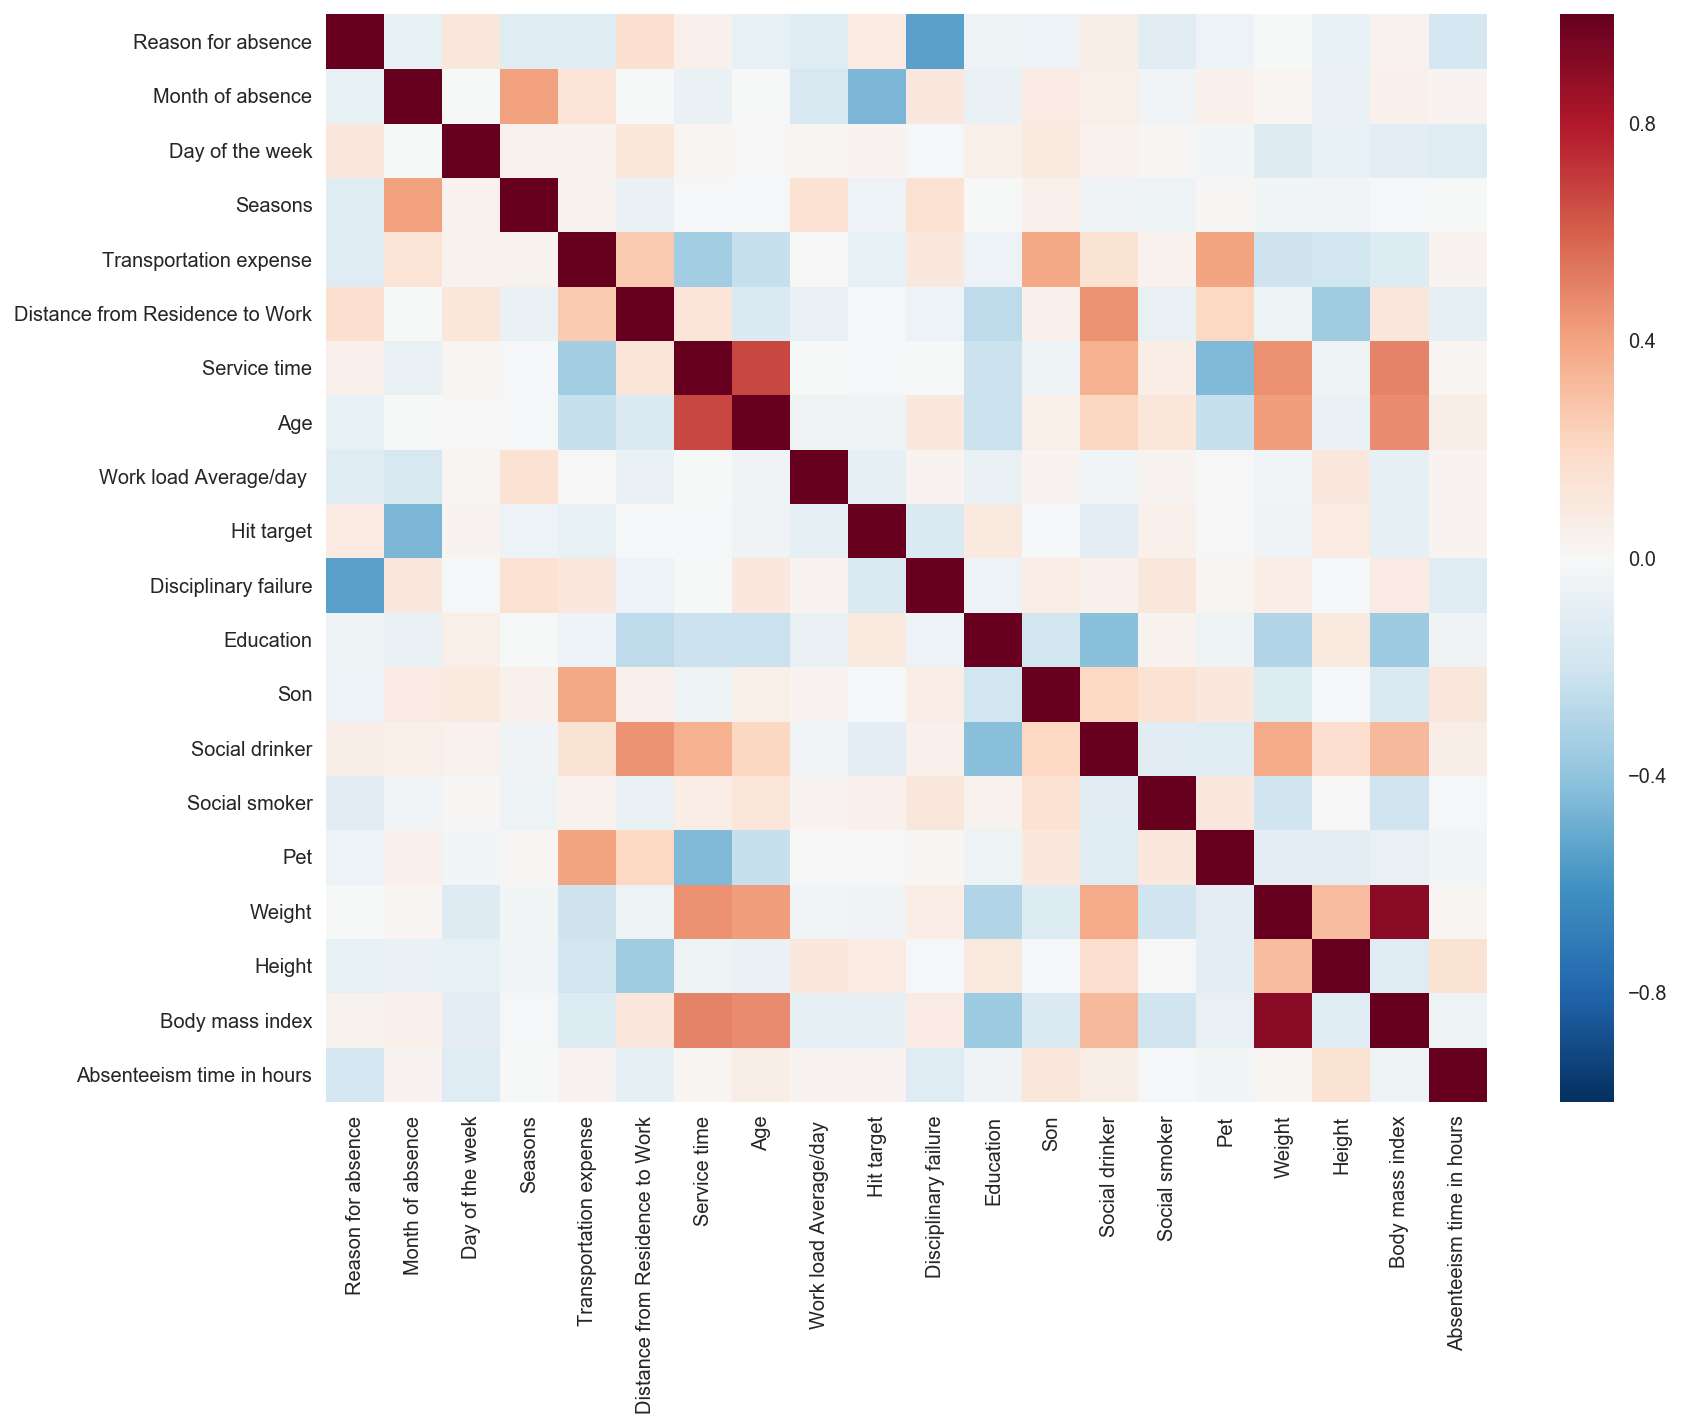

In [196]:
size = (13, 10)
fig, ax = plt.subplots(figsize=size)
sns.heatmap(data.corr(), ax=ax);

# 5

### Комментарий к решению
Отлично :)

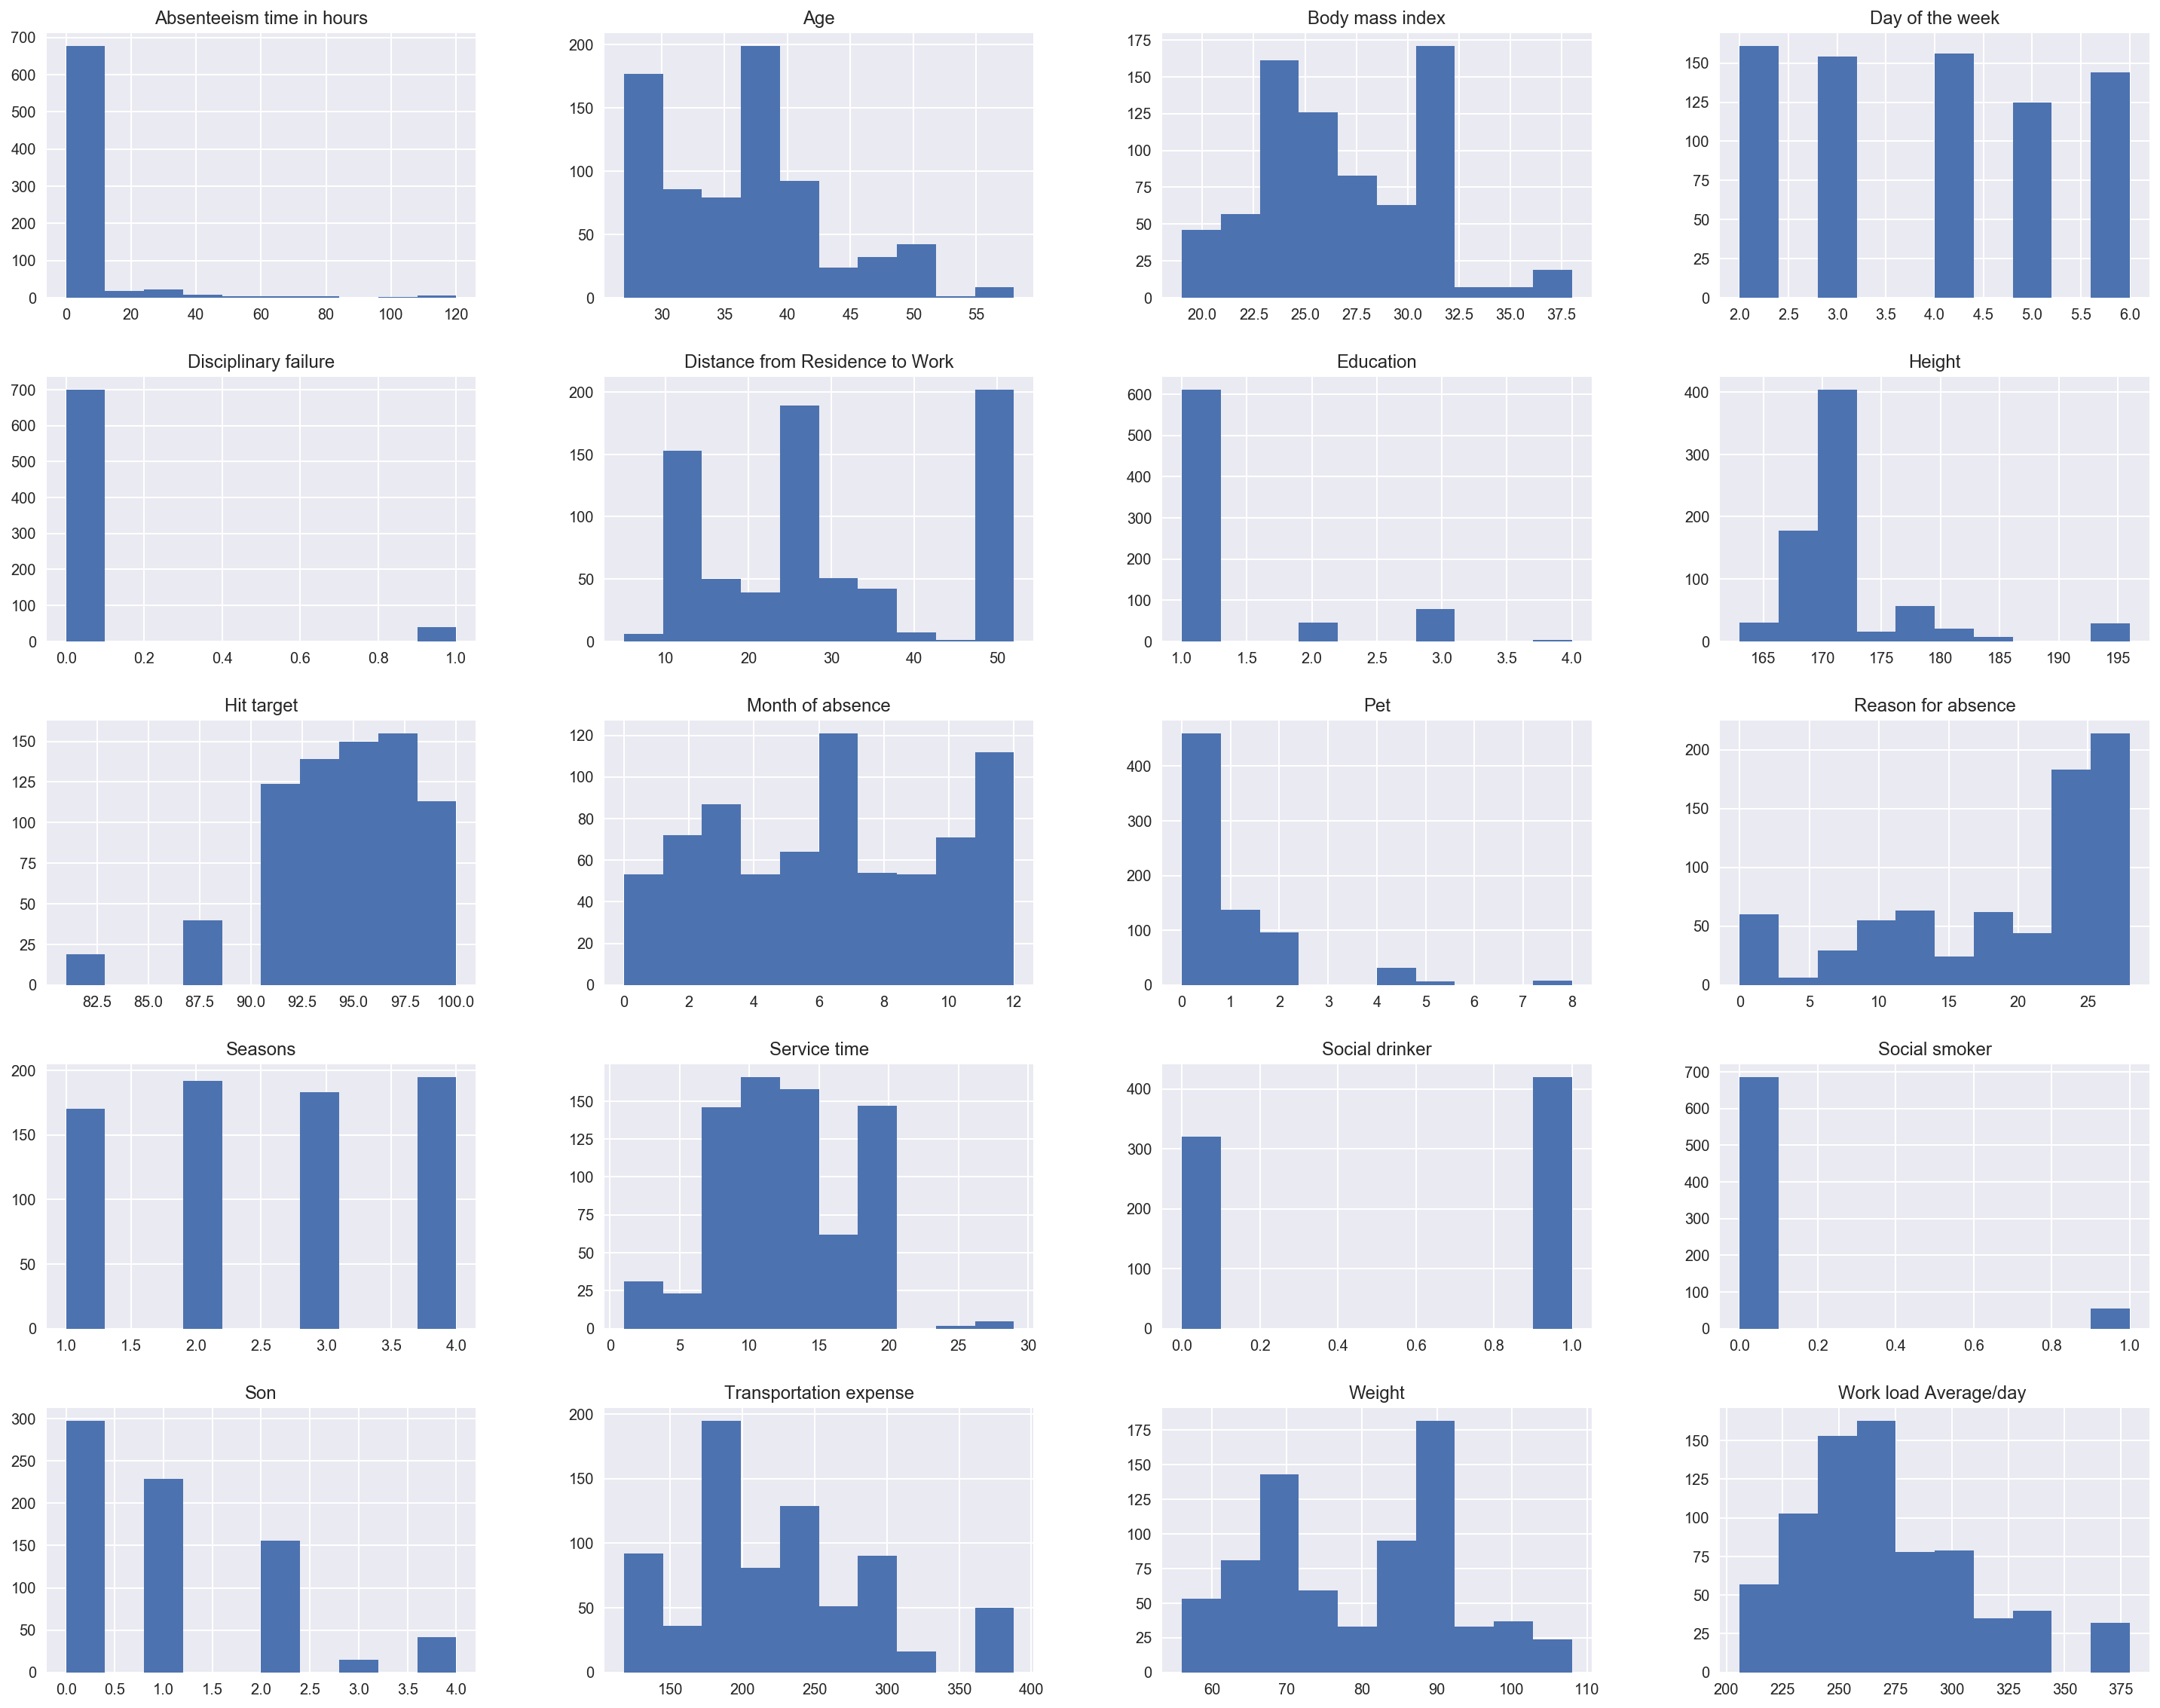

In [197]:
data.hist(figsize=(25, 20));

# 6

### Комментарий к решению
Действительно, хороший вывод!

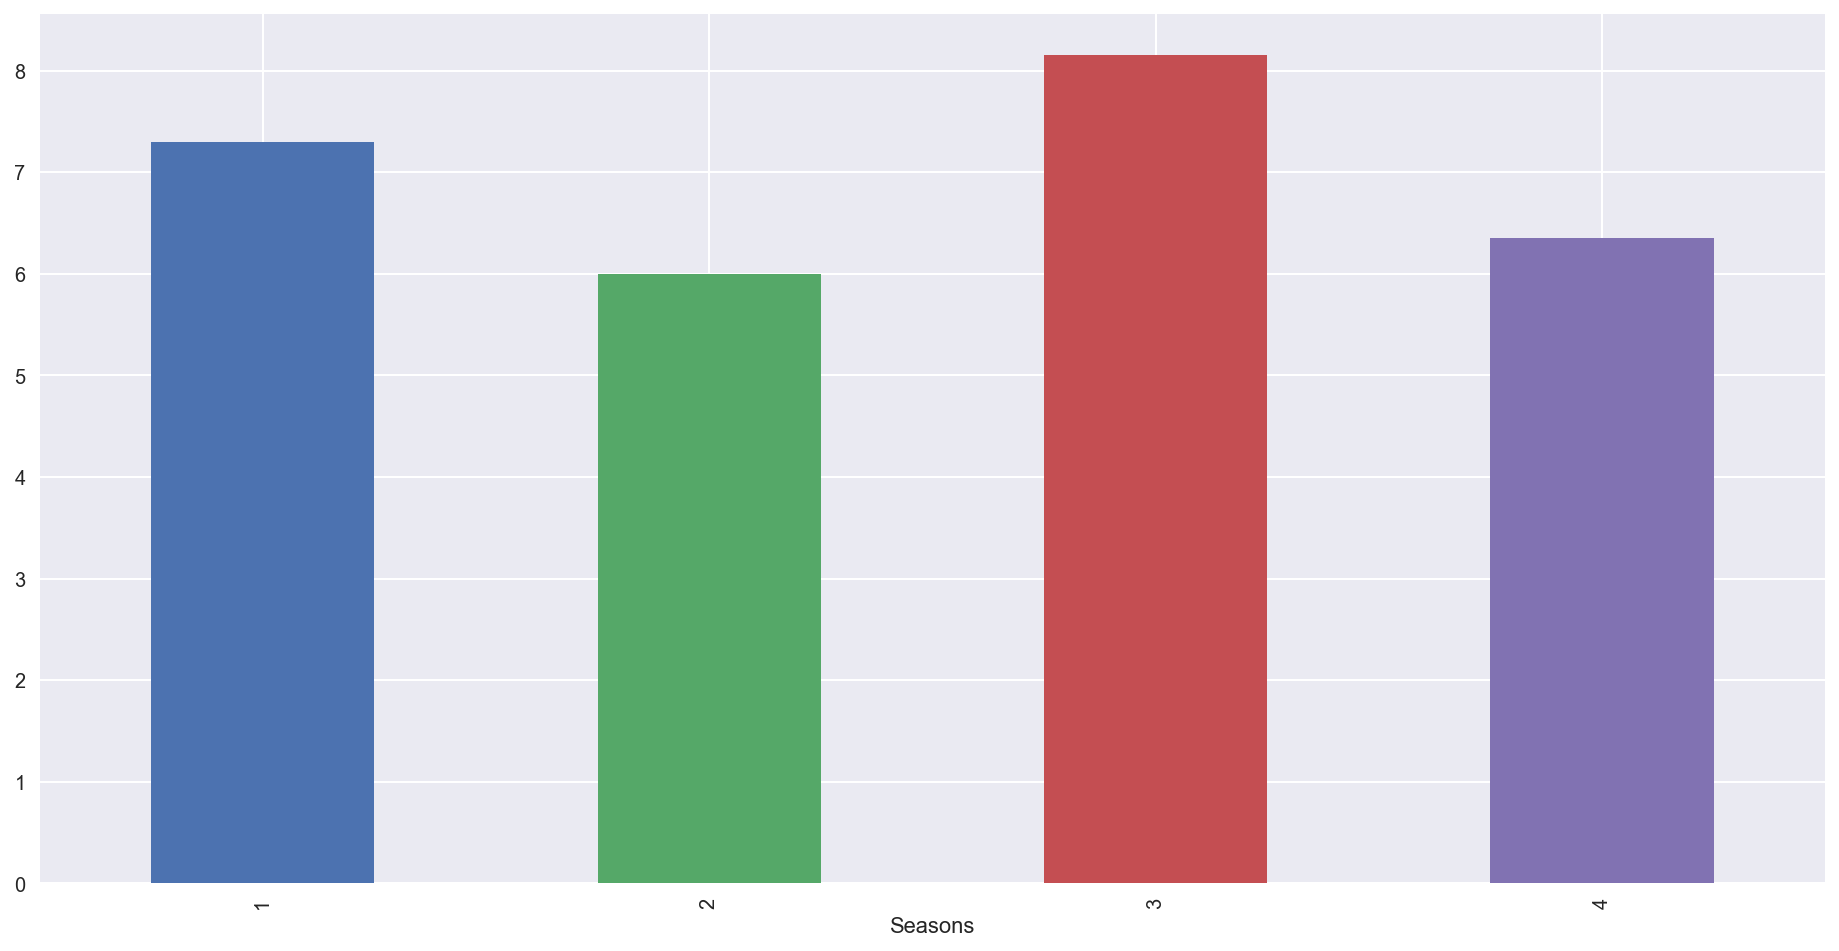

In [198]:
size = (16, 8)
fig, ax = plt.subplots(figsize=size)
data.groupby('Seasons')['Absenteeism time in hours'].mean().plot.bar();

Самые длинные пропуски в 3 сезоне. В описании данных находим, что третий сезон – зима. Это может быть вызванно, например, тем, что зимой дороги заснежены и дорога до работы может занимать больше времени

# 7

### Комментарий к решению
Очень крутые вопросы и визуализации!

Мы видим, что люди, живущие ближе к работе, имеют в среднем большее Absenteeism time in hours (отрицательная корр на heatmap), что довольно странно. Чем ближе человек живёт к работе, тем быстрее он должен до неё добираться. Изобразим графически:

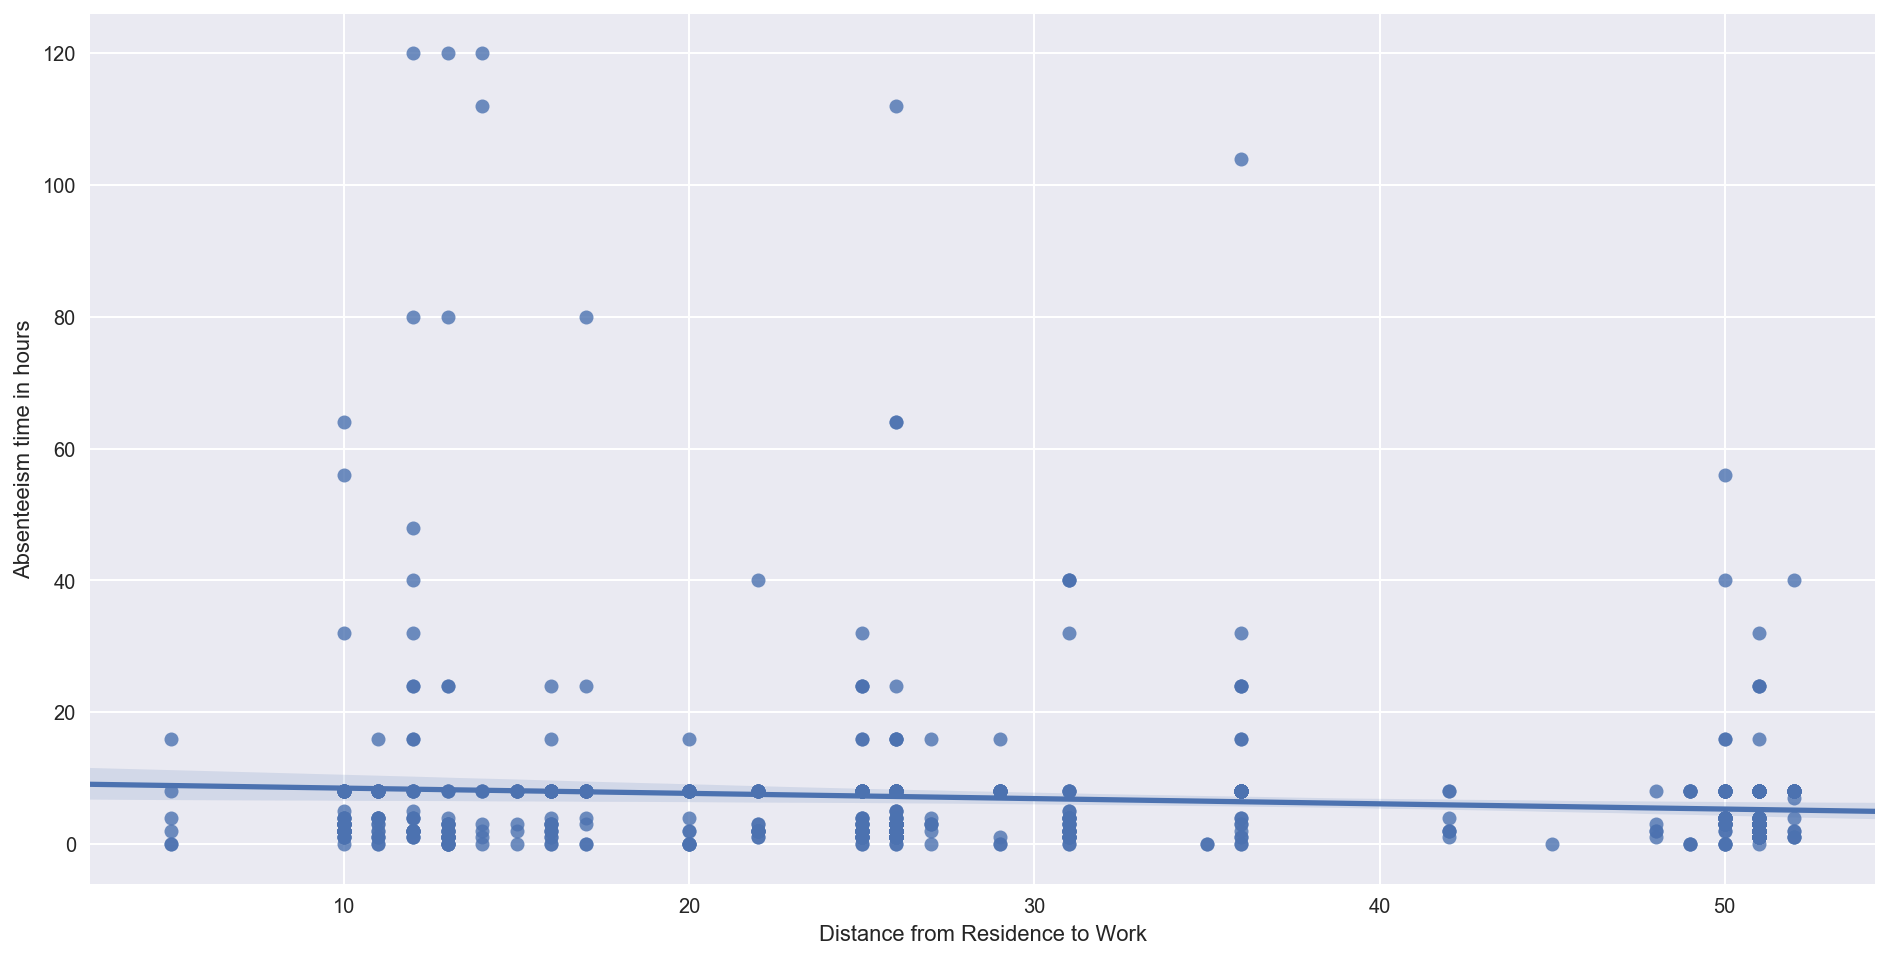

In [199]:
size = (16, 8)
fig, ax = plt.subplots(figsize=size)
sns.regplot(x="Distance from Residence to Work", y="Absenteeism time in hours", data=data);

Заметим, что у нас довольно много выбросов

Заметим, что люди, которые отсутствовали на работе больше 4 часов скорее всего не опаздывают, а совсем не придут – посмотрим только на тех, кто отсутствовал не более, чем 4 часа

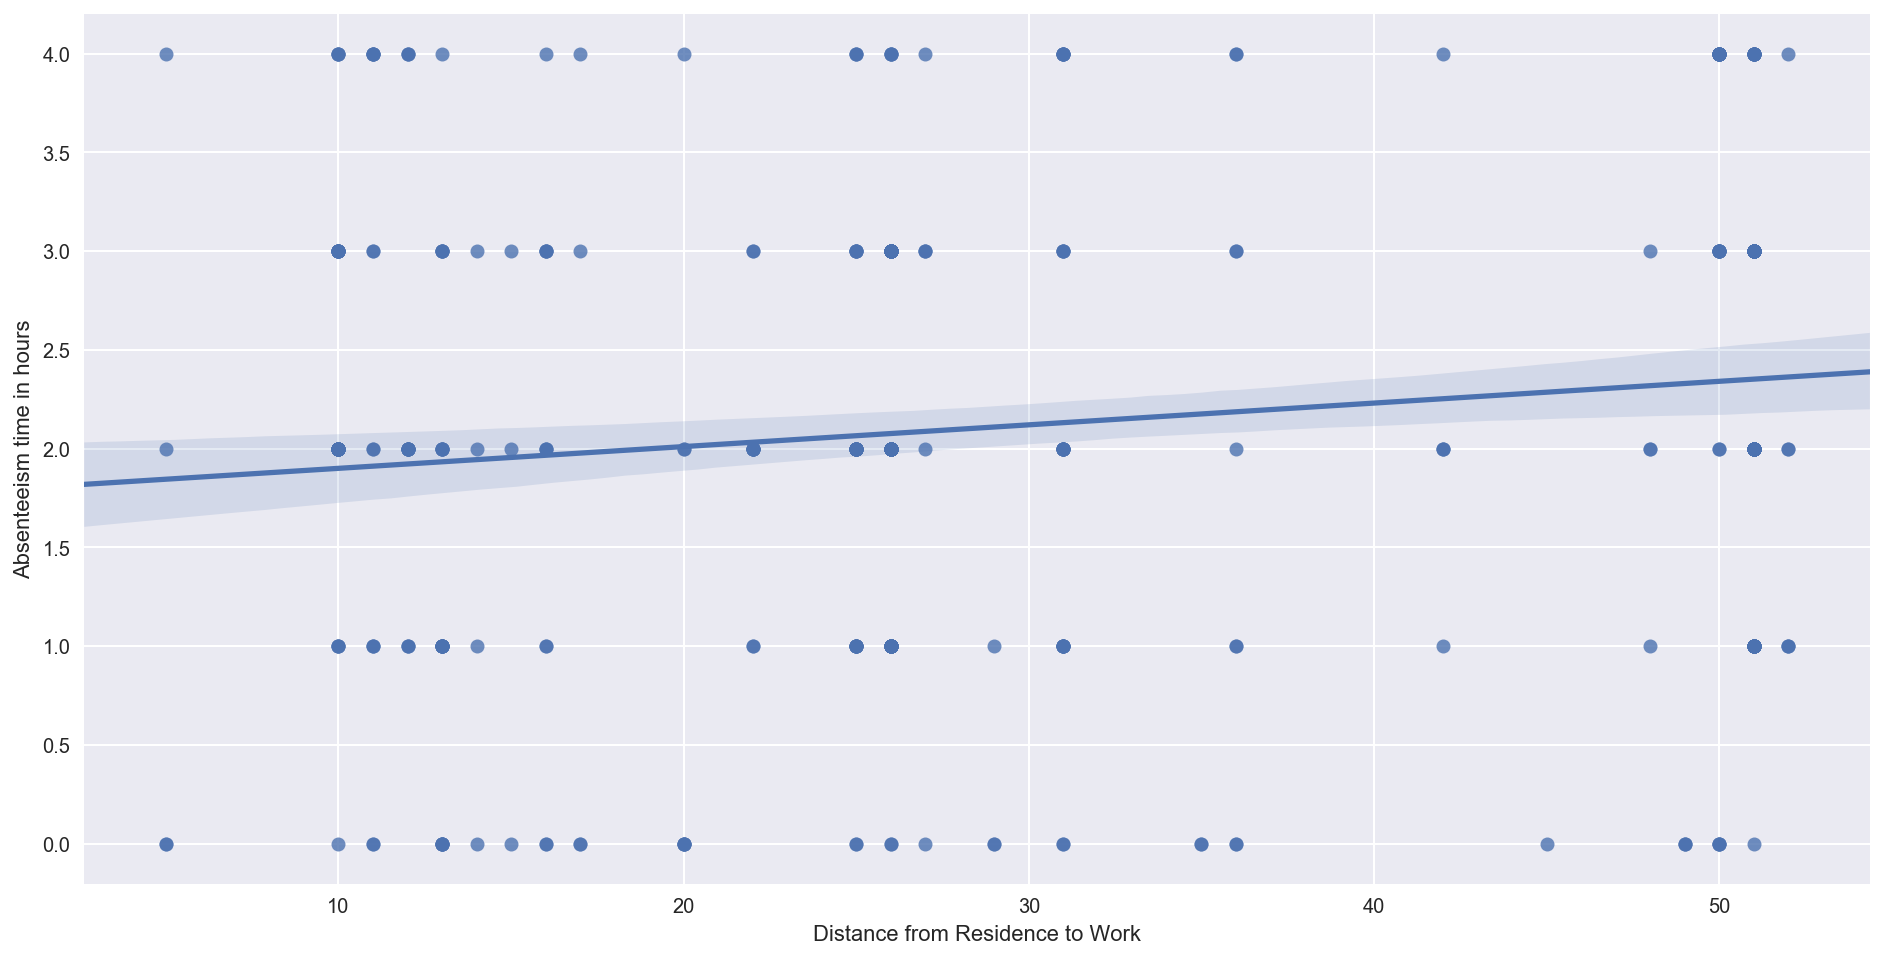

In [201]:
size = (16, 8)
fig, ax = plt.subplots(figsize=size)
sns.regplot(x="Distance from Residence to Work", y="Absenteeism time in hours", 
            data=data[data['Absenteeism time in hours'] <= 4]);

Ну что-же, гипотеза подтвердилась: действительно, чем дальше человек живёт от работы, тем больше его время отсутствия на работе в случае, если он всё же придёт на работу в ближайшие 4 часа.

Другой подход – посмотреть только на людей, опоздавших на работу по неуважительной причине. Смотрим в даных: это соответствует числу 26 признака Reason for absence

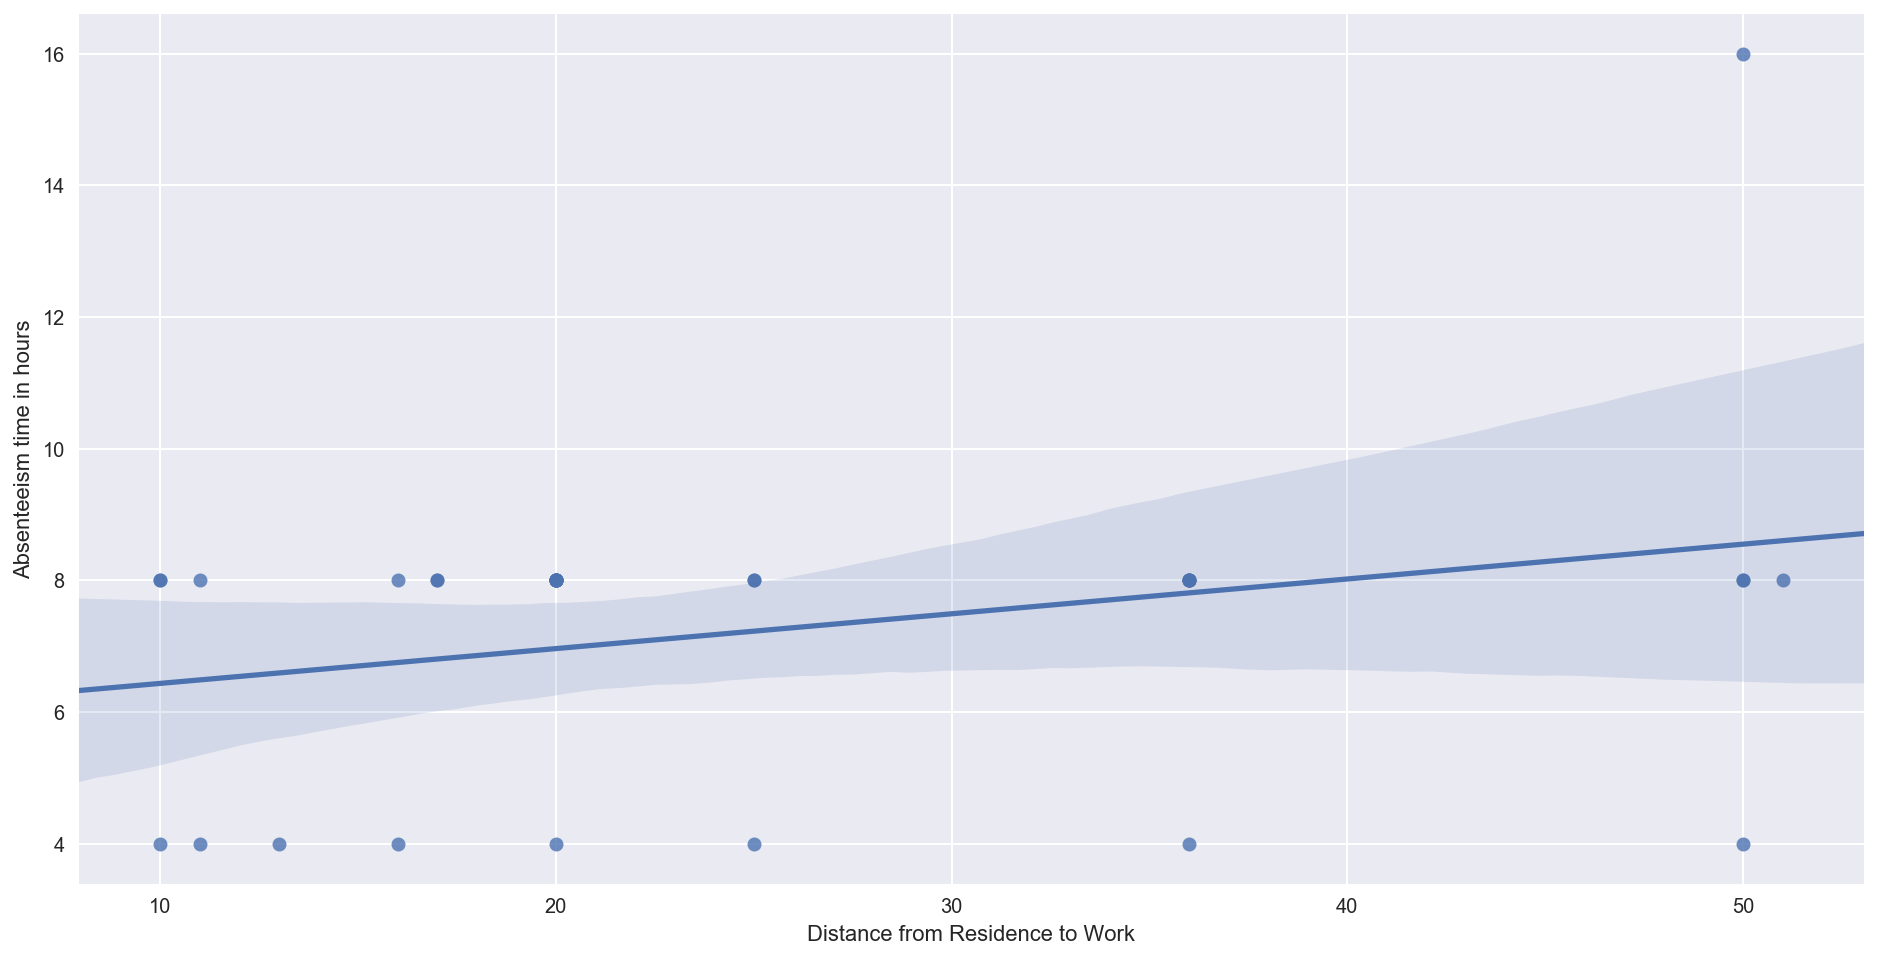

In [202]:
size = (16, 8)
fig, ax = plt.subplots(figsize=size)
sns.regplot(x="Distance from Residence to Work", y="Absenteeism time in hours", 
            data=data[data['Reason for absence'] == 26]);

Подумаем, кто может опаздывать без уважительной причины? Например, пьющие люди. 
Здесь может быть два эффекта: 
либо прямой эффект того, что они пили и проспали работу из-за этого, 
либо косвенный эффект заключающийся в том, что безответственные люди чаще являются одновременно пьющими и теми, кто опаздывает на работу без уважительной причины

In [203]:
just_drink = data[data['Reason for absence'] == 26]['Social drinker'].mean()
just_drink

0.7575757575757576

In [204]:
not_just_drink = data[data['Reason for absence'] != 26]['Social drinker'].mean()
not_just_drink

0.5586987270155587

In [205]:
if just_drink > not_just_drink:
    print('Действительно, люди, которые опаздывают на работу без уважительной причины в среднем чаще являются пьющими, чем люди, которые опаздывавают на работу по иным причинам')

Действительно, люди, которые опаздывают на работу без уважительной причины в среднем чаще являются пьющими, чем люди, которые опаздывавают на работу по иным причинам


Посмотрим, по каким причинам чаще всего люди не появляются на работе:

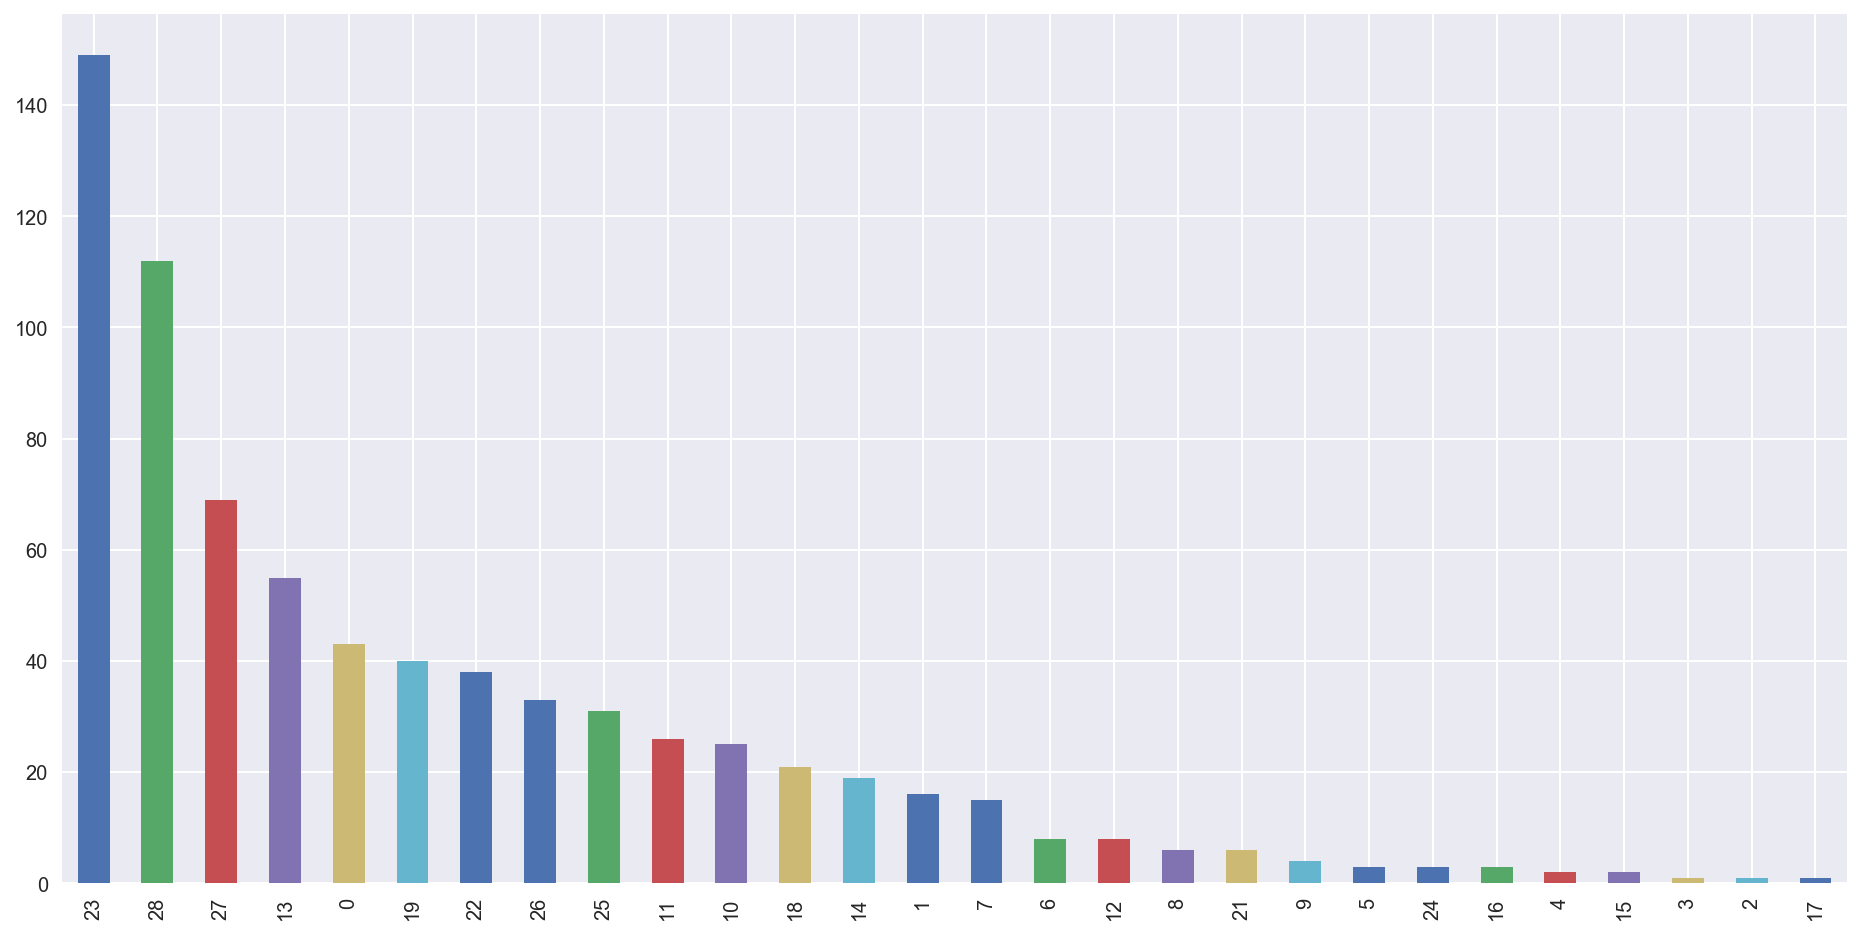

In [206]:
size = (16, 8)
fig, ax = plt.subplots(figsize=size)
data['Reason for absence'].value_counts().plot.bar();

Заметим, что чаще всего люди отсутствуют на работе по причине консультации с врачом (medical consultation, dental consultation). Так же заметим, что в данных есть значение 0 признака Reason for absence

В описании данных нет такого значения, посмотрим на сами данные

In [207]:
data[data['Reason for absence'] == 0]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
50,0,9,2,4,260,50,11,36,241.476,92,1,1,4,1,0,0,65,168,23,0
51,0,9,2,4,225,26,9,28,241.476,92,1,1,1,0,0,2,69,169,24,0
54,0,9,3,4,289,36,13,33,241.476,92,1,1,2,1,0,1,90,172,30,0
55,0,9,3,4,118,13,18,50,241.476,92,1,1,1,1,0,0,98,178,31,0
58,0,9,4,4,369,17,12,31,241.476,92,1,1,3,1,0,0,70,169,25,0
64,0,10,4,4,118,13,18,50,253.465,93,1,1,1,1,0,0,98,178,31,0
203,0,4,2,3,235,29,12,48,326.452,96,1,1,1,0,1,5,88,163,33,0
213,0,5,4,3,279,5,14,39,378.884,92,1,1,2,1,1,0,68,168,24,0
214,0,5,4,3,330,16,4,28,378.884,92,1,2,0,0,0,0,84,182,25,0


In [208]:
len(data[data['Reason for absence'] == 0]) - len(data[(data['Reason for absence'] == 0) & (data['Absenteeism time in hours'] == 0)])

0

In [209]:
len(data[data['Absenteeism time in hours'] == 0]) - len(data[(data['Reason for absence'] == 0) & (data['Absenteeism time in hours'] == 0)])

1

Видимо, значение 0 признака Reason for absence означает, что опоздание было незначительным: Absenteeism time in hours ≈ 0.
В дальнейшем я бы исключила эти наблюдения.